# Get Data

In [7]:
#!pip install CherryPy
#!pip install requests-oauthlib
#!pip install python-dateutil==2.4.0

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import fitbit
import gather_keys_oauth2 as Oauth2
import pandas as pd 
import datetime


# YOU NEED TO PUT IN YOUR OWN CLIENT_ID AND CLIENT_SECRET
CLIENT_ID='23QQNX'
CLIENT_SECRET='2cf8156ff7b81eadd26d80a30082067c'

# API Authorization

In [8]:
server=Oauth2.OAuth2Server(CLIENT_ID, CLIENT_SECRET)
server.browser_authorize()
ACCESS_TOKEN=str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN=str(server.fitbit.client.session.token['refresh_token'])
auth2_client=fitbit.Fitbit(CLIENT_ID,CLIENT_SECRET,oauth2=True,access_token=ACCESS_TOKEN,refresh_token=REFRESH_TOKEN)

[07/Apr/2023:20:00:00] ENGINE Listening for SIGTERM.
[07/Apr/2023:20:00:00] ENGINE Bus STARTING
[07/Apr/2023:20:00:00] ENGINE Set handler for console events.
CherryPy Checker:
The Application mounted at '' has an empty config.

[07/Apr/2023:20:00:00] ENGINE Started monitor thread 'Autoreloader'.
[07/Apr/2023:20:00:00] ENGINE Serving on http://127.0.0.1:8080
[07/Apr/2023:20:00:00] ENGINE Bus STARTED


127.0.0.1 - - [07/Apr/2023:20:00:15] "GET /?code=93bb1bbab1aebdbf8b1cbdb59de6d883a0555777&state=muLkw9EyFvIF9Ou5aLUBloTdEkJwML HTTP/1.1" 200 122 "" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"
127.0.0.1 - - [07/Apr/2023:20:00:15] "GET /favicon.ico HTTP/1.1" 200 1406 "http://127.0.0.1:8080/?code=93bb1bbab1aebdbf8b1cbdb59de6d883a0555777&state=muLkw9EyFvIF9Ou5aLUBloTdEkJwML" "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36"


[07/Apr/2023:20:00:16] ENGINE Bus STOPPING
[07/Apr/2023:20:00:16] ENGINE HTTP Server cherrypy._cpwsgi_server.CPWSGIServer(('127.0.0.1', 8080)) shut down
[07/Apr/2023:20:00:16] ENGINE Stopped thread 'Autoreloader'.
[07/Apr/2023:20:00:16] ENGINE Removed handler for console events.
[07/Apr/2023:20:00:16] ENGINE Bus STOPPED
[07/Apr/2023:20:00:16] ENGINE Bus EXITING
[07/Apr/2023:20:00:16] ENGINE Waiting for child threads to terminate...
[07/Apr/2023:20:00:16] ENGINE Bus EXITED
[07/Apr/2023:20:00:16] ENGINE Waiting for thread Thread-24.


# Get One day of Data

In [9]:
# You will have to modify this 
# depending on when you started to use a fitbit
oneDate = pd.datetime(year = 2023, month = 3, day = 29)

C:\Users\30698\AppData\Local\Temp\ipykernel_8384\2645702017.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  oneDate = pd.datetime(year = 2023, month = 3, day = 29)


In [10]:
help(auth2_client.intraday_time_series)

Help on method intraday_time_series in module fitbit.api:

intraday_time_series(resource, base_date='today', detail_level='1min', start_time=None, end_time=None) method of fitbit.api.Fitbit instance
    The intraday time series extends the functionality of the regular time series, but returning data at a
    more granular level for a single day, defaulting to 1 minute intervals. To access this feature, one must
    fill out the Private Support form here (see https://dev.fitbit.com/docs/help/).
    For details on the resources available and more information on how to get access, see:
    
    https://dev.fitbit.com/docs/activity/#get-activity-intraday-time-series



In [17]:
oneDayData = auth2_client.intraday_time_series('activities/heart', oneDate, detail_level='1sec')

In [18]:
oneDayData

{'activities-heart': [{'dateTime': '2023-03-29',
   'value': {'customHeartRateZones': [],
    'heartRateZones': [{'caloriesOut': 2015.34384,
      'max': 127,
      'min': 30,
      'minutes': 1440,
      'name': 'Out of Range'},
     {'caloriesOut': 0,
      'max': 150,
      'min': 127,
      'minutes': 0,
      'name': 'Fat Burn'},
     {'caloriesOut': 0,
      'max': 178,
      'min': 150,
      'minutes': 0,
      'name': 'Cardio'},
     {'caloriesOut': 0, 'max': 220, 'min': 178, 'minutes': 0, 'name': 'Peak'}],
    'restingHeartRate': 81}}],
 'activities-heart-intraday': {'dataset': [{'time': '00:00:10', 'value': 76},
   {'time': '00:00:15', 'value': 77},
   {'time': '00:00:20', 'value': 80},
   {'time': '00:00:25', 'value': 81},
   {'time': '00:00:30', 'value': 81},
   {'time': '00:00:35', 'value': 80},
   {'time': '00:00:45', 'value': 79},
   {'time': '00:00:50', 'value': 79},
   {'time': '00:00:55', 'value': 79},
   {'time': '00:01:00', 'value': 78},
   {'time': '00:01:10', 'va

In [13]:
df = pd.DataFrame(oneDayData['activities-heart-intraday']['dataset'])

In [14]:
df.head()

,time,value
0,00:00:10,76
1,00:00:15,77
2,00:00:20,80
3,00:00:25,81
4,00:00:30,81


# Get Multiple Days of Data

In [19]:
# startTime is first date of data that I want. 
# You will need to modify for the date you want your data to start
startTime = pd.datetime(year = 2023, month = 3, day = 28)
endTime = pd.datetime.today().date() - datetime.timedelta(days=1)

C:\Users\30698\AppData\Local\Temp\ipykernel_8384\1104545340.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  startTime = pd.datetime(year = 2023, month = 3, day = 28)
C:\Users\30698\AppData\Local\Temp\ipykernel_8384\1104545340.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  endTime = pd.datetime.today().date() - datetime.timedelta(days=1)


In [20]:
date_list = []
df_list = []
allDates = pd.date_range(start=startTime, end = endTime)

for oneDate in allDates:
    
    oneDate = oneDate.date().strftime("%Y-%m-%d")
    
    oneDayData = auth2_client.intraday_time_series('activities/heart', base_date=oneDate, detail_level='1sec')

    df = pd.DataFrame(oneDayData['activities-heart-intraday']['dataset'])
    
    date_list.append(oneDate)
    
    df_list.append(df)
    
final_df_list = []

for date, df in zip(date_list, df_list):

    if len(df) == 0:
        continue
    
    df.loc[:, 'date'] = pd.to_datetime(date)
    
    final_df_list.append(df)

final_df = pd.concat(final_df_list, axis = 0)

In [21]:
## Optional Making of the data have more detailed timestamp (day and hour instead of day)
hoursDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.hour.apply(lambda x: datetime.timedelta(hours = x))
minutesDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.minute.apply(lambda x: datetime.timedelta(minutes = x))
secondsDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.second.apply(lambda x: datetime.timedelta(seconds = x))

# Getting the date to also have the time of the day
final_df['date'] = final_df['date'] + hoursDelta + minutesDelta + secondsDelta

In [22]:
final_df.tail()

,time,value,date
12156,23:58:12,79,2023-04-06 23:58:12
12157,23:58:27,84,2023-04-06 23:58:27
12158,23:58:42,83,2023-04-06 23:58:42
12159,23:58:52,84,2023-04-06 23:58:52
12160,23:58:57,85,2023-04-06 23:58:57


# Try to Graph Intraday Data

<AxesSubplot:xlabel='time'>

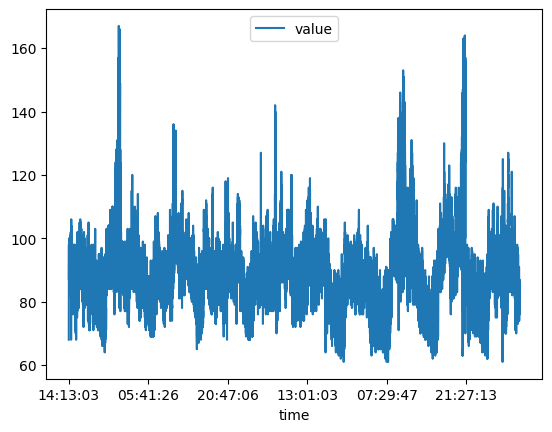

In [23]:
# this is bad as time is duplicated over many days fixing the date column will fix the problem
final_df.plot('time', 'value')

In [24]:
# The code below is not efficient as I call to_datetime twice
hoursDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.hour.apply(lambda x: datetime.timedelta(hours = x))
minutesDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.minute.apply(lambda x: datetime.timedelta(minutes = x))
secondsDelta = pd.to_datetime(final_df.loc[:, 'time']).dt.second.apply(lambda x: datetime.timedelta(seconds = x))

In [25]:
# Getting the date to also have the time of the day
final_df['date'] = final_df['date'] + hoursDelta + minutesDelta + secondsDelta

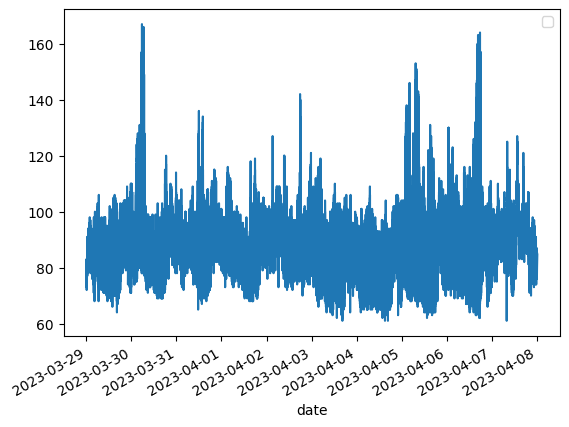

In [26]:
# this fixed the problem.
final_df.plot('date', 'value')
plt.legend('')

In [27]:
## Looking at a couple days only. 
startDate = pd.datetime(year = 2023, month = 3, day = 30)
lastDate = pd.datetime(year = 2023, month = 3, day = 31)

coupledays_df = final_df.loc[final_df.loc[:, 'date'].between(startDate, lastDate), :]

C:\Users\30698\AppData\Local\Temp\ipykernel_8384\3699053338.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  startDate = pd.datetime(year = 2023, month = 3, day = 30)
C:\Users\30698\AppData\Local\Temp\ipykernel_8384\3699053338.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  lastDate = pd.datetime(year = 2023, month = 3, day = 31)


In [28]:
coupledays_df

,time,value,date
5756,12:00:02,107,2023-03-30 00:00:04
5757,12:00:07,108,2023-03-30 00:00:14
5758,12:00:17,106,2023-03-30 00:00:34
5759,12:00:22,105,2023-03-30 00:00:44
5760,12:00:27,104,2023-03-30 00:00:54
...,...,...,...
5685,11:59:26,88,2023-03-30 23:58:52
5686,11:59:31,91,2023-03-30 23:59:02
5687,11:59:36,92,2023-03-30 23:59:12
5688,11:59:51,92,2023-03-30 23:59:42


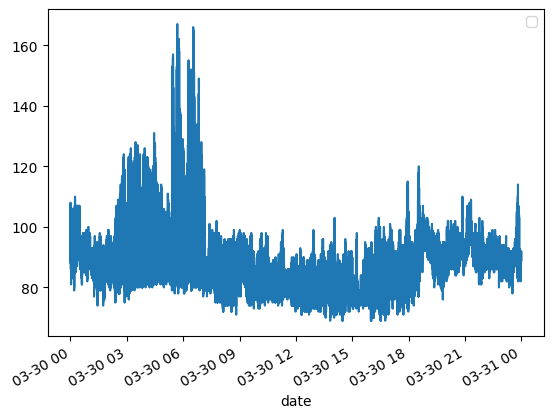

In [30]:
coupledays_df.plot('date', 'value')
plt.legend('')

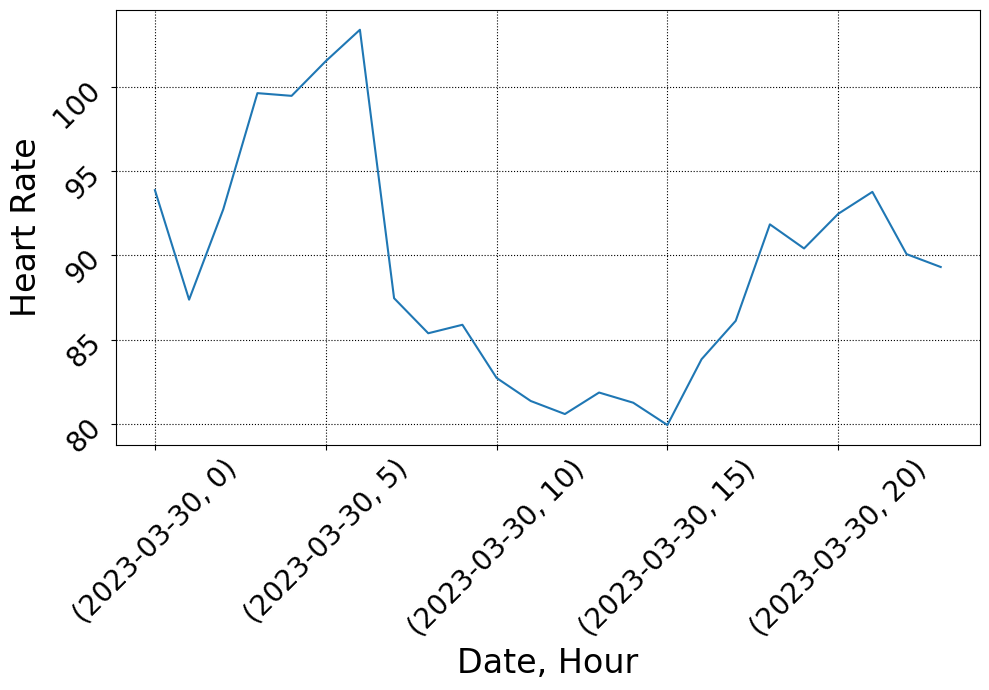

In [31]:
fig, ax = plt.subplots(figsize=(10, 7))

times = pd.to_datetime(coupledays_df['date'])
coupledays_df.groupby([times.dt.date,times.dt.hour]).value.mean().plot(ax = ax)

ax.grid(True,
    axis = 'both',
    zorder = 0,
    linestyle = ':',
    color = 'k')
ax.tick_params(axis = 'both', rotation = 45, labelsize = 20)
ax.set_xlabel('Date, Hour', fontsize = 24)
ax.set_ylabel('Heart Rate', fontsize = 24)
fig.tight_layout()
fig.savefig('coupledaysavergedByMin.png', format = 'png', dpi = 300)

# Resting Heart Rate

In [32]:
# startTime is first date of data that I want. 
# You will need to modify for the date you want your data to start
startTime = pd.datetime(year = 2023, month = 3, day = 28)
endTime = pd.datetime.today().date() - datetime.timedelta(days=1)

C:\Users\30698\AppData\Local\Temp\ipykernel_8384\1104545340.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  startTime = pd.datetime(year = 2023, month = 3, day = 28)
C:\Users\30698\AppData\Local\Temp\ipykernel_8384\1104545340.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  endTime = pd.datetime.today().date() - datetime.timedelta(days=1)


In [33]:
date_list = []
resting_list = []

allDates = pd.date_range(start=startTime, end = endTime)

for oneDate in allDates:
    
    oneDate = oneDate.date().strftime("%Y-%m-%d")
    
    oneDayData = auth2_client.intraday_time_series('activities/heart', base_date=oneDate, detail_level='1sec')
    
    date_list.append(oneDate)
    
    resting_list.append(oneDayData['activities-heart'][0]['value']['restingHeartRate'])

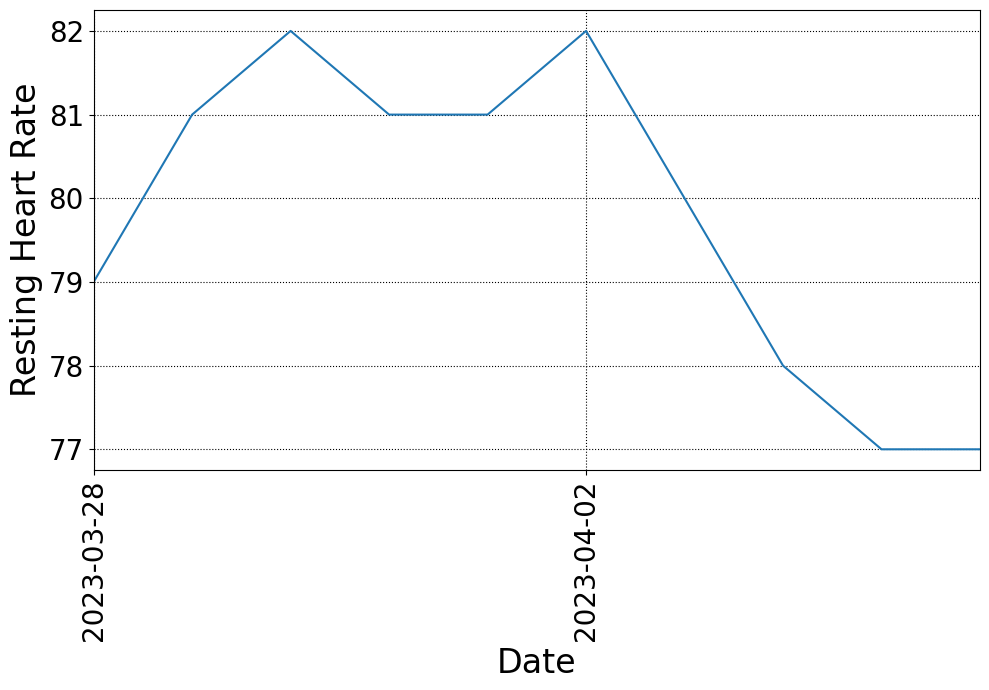

In [34]:

fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(date_list, resting_list )

# This is just making it so there isnt a grid line or text for every point
xtick_list = []
xticklabel_list = []
for index, label in enumerate(ax.get_xticklabels()):
    if index % 5 == 0:
        xticklabel_list.append(label)
        xtick_list.append(index)

ax.grid(True,
    axis = 'both',
    zorder = 0,
    linestyle = ':',
    color = 'k')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_xticks(xtick_list)
ax.tick_params(axis = 'x', rotation = 90,labelsize = 20)
ax.set_xlim(0, index)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, rotation_mode="anchor", ha = 'right')
ax.set_xlabel('Date', fontsize = 24)
ax.set_ylabel('Resting Heart Rate', fontsize = 24)
fig.tight_layout()
fig.savefig('restingHR_graph.png', format = 'png', dpi = 300)

In [35]:
resting_df = pd.DataFrame({'date': date_list, 'RHR': resting_list})

In [36]:
resting_df.head()

,date,RHR
0,2023-03-28,79
1,2023-03-29,81
2,2023-03-30,82
3,2023-03-31,81
4,2023-04-01,81


# Get Sleep Data

In [44]:
startTime = pd.datetime(year = 2023, month = 3, day = 29)
endTime = pd.datetime.today().date() - datetime.timedelta(days=1)

C:\Users\30698\AppData\Local\Temp\ipykernel_8384\3876127390.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  startTime = pd.datetime(year = 2023, month = 3, day = 29)
C:\Users\30698\AppData\Local\Temp\ipykernel_8384\3876127390.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  endTime = pd.datetime.today().date() - datetime.timedelta(days=1)


In [45]:
allDates = pd.date_range(start=startTime, end = endTime)

In [47]:
date_list = []
df_list = []
stages_df_list = []

allDates = pd.date_range(start=startTime, end = endTime)

for oneDate in allDates:
    
    oneDate = oneDate.date().strftime("%Y-%m-%d")
    
    oneDayData = auth2_client.sleep(date=oneDate)
    
    # get number of minutes for each stage of sleep and such. 
    stages_df = pd.DataFrame(oneDayData['summary'])

    df = pd.DataFrame(oneDayData['sleep'][0]['minuteData'])
    
    date_list.append(oneDate)
    
    df_list.append(df)
    
    stages_df_list.append(stages_df)
    
final_df_list = []

final_stages_df_list = []

for date, df, stages_df in zip(date_list, df_list, stages_df_list):

    if len(df) == 0:
        continue
    
    df.loc[:, 'date'] = pd.to_datetime(date)
    
    stages_df.loc[:, 'date'] = pd.to_datetime(date)
    
    final_df_list.append(df)
    final_stages_df_list.append(stages_df)

final_df = pd.concat(final_df_list, axis = 0)

final_stages_df = pd.concat(final_stages_df_list, axis = 0)

In [48]:
columns = final_stages_df.columns[~final_stages_df.columns.isin(['date'])].values

In [49]:
columns

array(['stages', 'totalMinutesAsleep', 'totalSleepRecords',
       'totalTimeInBed'], dtype=object)

In [50]:
pd.concat([final_stages_df[columns] + 2, final_stages_df[['date']]], axis = 1)

,stages,totalMinutesAsleep,totalSleepRecords,totalTimeInBed,date
deep,83,464,3,488,2023-03-29
light,233,464,3,488,2023-03-29
rem,98,464,3,488,2023-03-29
wake,80,464,3,488,2023-03-29
deep,74,471,3,492,2023-03-30
light,281,471,3,492,2023-03-30
rem,79,471,3,492,2023-03-30
wake,64,471,3,492,2023-03-30
deep,80,501,3,528,2023-03-31
light,298,501,3,528,2023-03-31


In [54]:
auth2_client.user_profile_get()


{'user': {'age': 24,
  'ambassador': False,
  'autoStrideEnabled': True,
  'avatar': 'https://static0.fitbit.com/images/profile/defaultProfile_100.png',
  'avatar150': 'https://static0.fitbit.com/images/profile/defaultProfile_150.png',
  'avatar640': 'https://static0.fitbit.com/images/profile/defaultProfile_640.png',
  'averageDailySteps': 8686,
  'challengesBeta': True,
  'clockTimeDisplayFormat': '24hour',
  'corporate': False,
  'corporateAdmin': False,
  'dateOfBirth': '1998-09-07',
  'displayName': 'Vasiliki',
  'displayNameSetting': 'name',
  'distanceUnit': 'METRIC',
  'encodedId': 'BHPWP9',
  'features': {'exerciseGoal': True},
  'foodsLocale': 'en_US',
  'fullName': 'Vasiliki',
  'gender': 'FEMALE',
  'glucoseUnit': 'METRIC',
  'height': 68.11023622047244,
  'heightUnit': 'METRIC',
  'isBugReportEnabled': False,
  'isChild': False,
  'isCoach': False,
  'languageLocale': 'en_EU',
  'legalTermsAcceptRequired': True,
  'locale': 'en_EU',
  'memberSince': '2023-03-28',
  'mfaEnab